# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [188]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [191]:
# Calculando a idade média das mães por município:
idade_media_maes = sinasc_raw.groupby('munResNome')['IDADEMAE'].mean().reset_index()
idade_media_maes.columns = ['Município', 'Idade Média das Mães']

# Calculando a idade média dos pais por município:
idade_media_pais = sinasc_raw.groupby('munResNome')['IDADEPAI'].mean().reset_index()
idade_media_pais.columns = ['Município', 'Idade Média dos Pais']

# Mesclando as duas tabelas:
idade_media_maes_pais = pd.merge(idade_media_maes, idade_media_pais, on='Município', how='outer')

# Exibindo o resultado:
idade_media_maes_pais


,Município,Idade Média das Mães,Idade Média dos Pais
0,Alta Floresta D'Oeste,25.991826,29.548701
1,Alto Alegre dos Parecis,24.844156,29.179104
2,Alto Paraíso,24.960177,28.833333
3,Alvorada D'Oeste,25.770732,30.757282
4,Ariquemes,25.607866,32.466667
5,Buritis,25.559177,30.812500
6,Cabixi,26.037500,34.333333
7,Cacaulândia,25.546667,36.333333
8,Cacoal,26.890102,30.931854
9,Campo Novo de Rondônia,24.825301,30.500000


### Plotando as informações para uma melhor visualização:

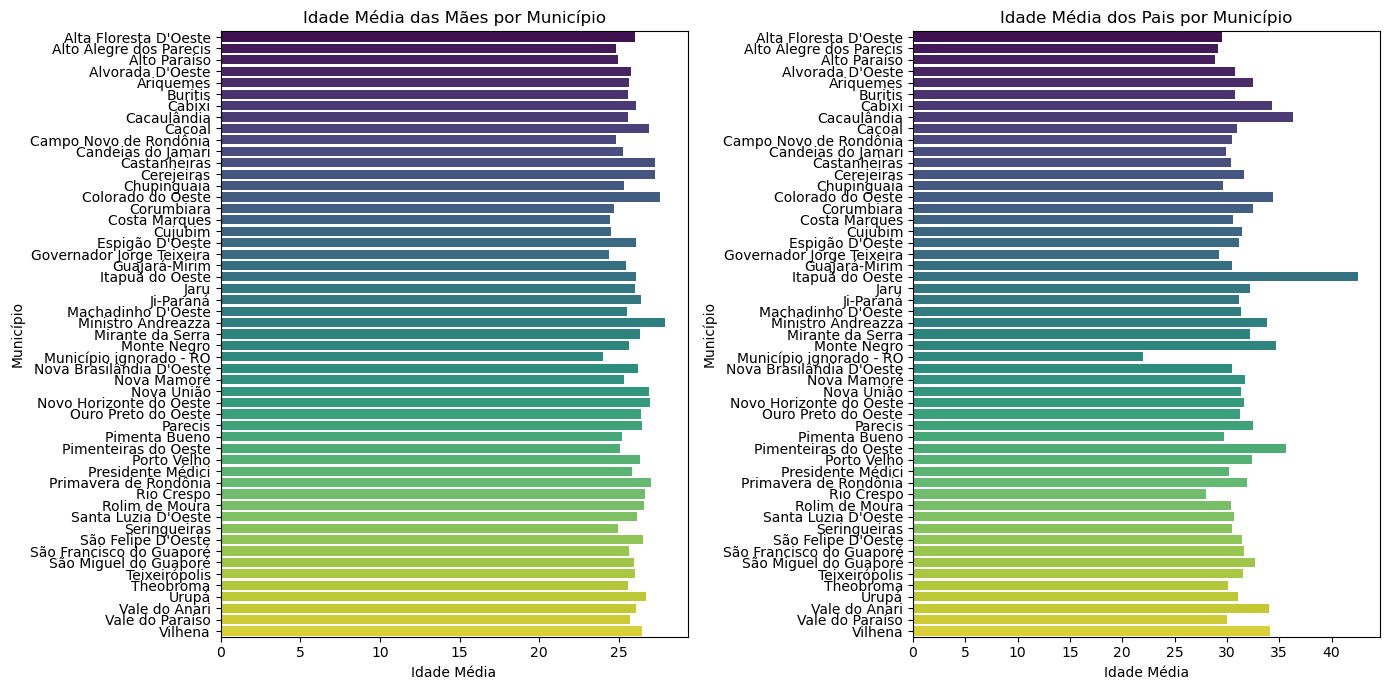

In [193]:
# Plotando as idades médias das mães e dos pais por município
plt.figure(figsize=(14, 7))

# Plot para Idade Média das Mães:
plt.subplot(1, 2, 1)
sns.barplot(data=idade_media_maes_pais, x='Idade Média das Mães', y='Município', palette='viridis')
plt.title('Idade Média das Mães por Município')
plt.xlabel('Idade Média')
plt.ylabel('Município')

# Plot para Idade Média dos Pais:
plt.subplot(1, 2, 2)
sns.barplot(data=idade_media_maes_pais, x='Idade Média dos Pais', y='Município', palette='viridis')
plt.title('Idade Média dos Pais por Município')
plt.xlabel('Idade Média')
plt.ylabel('Município')

plt.tight_layout()
plt.show()


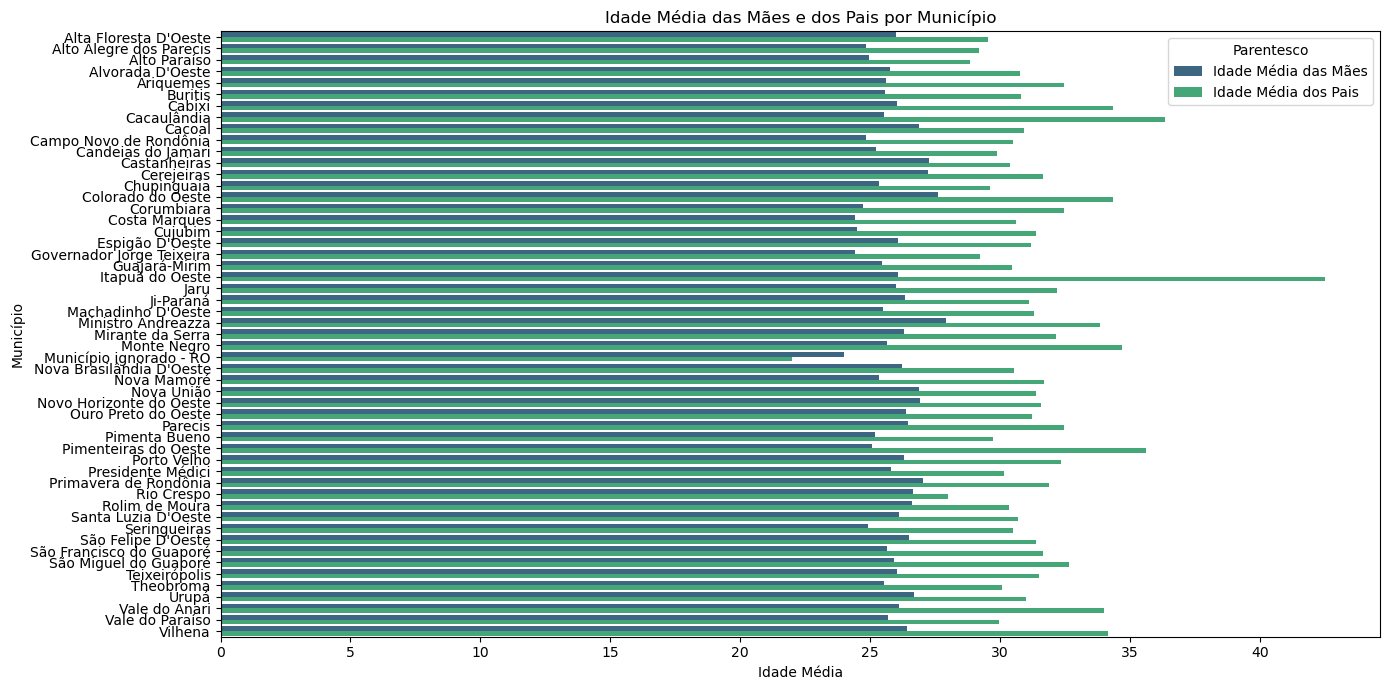

In [194]:
# Tudo num mesmo plot:

# Mesclando as duas tabelas:
idade_media_maes_pais = pd.merge(idade_media_maes, idade_media_pais, on='Município', how='outer')

# Transformando os dados para formato longo para facilitar o plot
idade_media_long = pd.melt(idade_media_maes_pais, id_vars='Município', 
                           value_vars=['Idade Média das Mães', 'Idade Média dos Pais'], 
                           var_name='Parentesco', value_name='Idade Média')

# Plotando as idades médias das mães e dos pais por município
plt.figure(figsize=(14, 7))
sns.barplot(data=idade_media_long, x='Idade Média', y='Município', hue='Parentesco', palette='viridis')
plt.title('Idade Média das Mães e dos Pais por Município')
plt.xlabel('Idade Média')
plt.ylabel('Município')
plt.legend(title='Parentesco')
plt.tight_layout()
plt.show()


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Data de nascimento: [19/06]/2019:

In [196]:
sinasc_raw[['DTNASC','SEXO','ESCMAE','PESO']] 

,DTNASC,SEXO,ESCMAE,PESO
0,2019-02-19,Masculino,8 a 11 anos,3685
1,2019-02-21,Feminino,8 a 11 anos,3055
2,2019-02-25,Feminino,8 a 11 anos,3460
3,2019-03-20,Feminino,12 anos ou mais,2982
4,2019-03-23,Feminino,8 a 11 anos,3310
...,...,...,...,...
27023,2019-12-13,Masculino,12 anos ou mais,2110
27024,2019-10-04,Masculino,8 a 11 anos,3310
27025,2019-08-02,Masculino,8 a 11 anos,3065
27026,2019-12-23,Masculino,8 a 11 anos,2352


In [197]:
# Ajustando o formato da data:

sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Verificando a conversão de data:
print(sinasc_raw['DTNASC'].head())

# Filtrando os dados para incluir apenas os nascimentos em 19/06/2019:
data_aniversario = '2019-06-19'
nascimentos_aniversario = sinasc_raw[sinasc_raw['DTNASC'] == data_aniversario]

# Verificando se há registros para a data:
print(nascimentos_aniversario.shape)

# Agrupando os dados por sexo e faixas de escolaridade da mãe, e calcular o peso médio dos bebês:
peso_medio_bebes = nascimentos_aniversario.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()
peso_medio_bebes.columns = ['Sexo', 'Escolaridade da Mãe', 'Peso Médio']

# Exibindo o resultado:
peso_medio_bebes

0   2019-02-19
1   2019-02-21
2   2019-02-25
3   2019-03-20
4   2019-03-23
Name: DTNASC, dtype: datetime64[ns]
(103, 69)


,Sexo,Escolaridade da Mãe,Peso Médio
0,Feminino,12 anos ou mais,3092.750000
1,Feminino,4 a 7 anos,2976.250000
2,Feminino,8 a 11 anos,3284.542857
3,Masculino,1 a 3 anos,1925.000000
4,Masculino,12 anos ou mais,3358.000000
5,Masculino,4 a 7 anos,3311.125000
6,Masculino,8 a 11 anos,3152.459459


### Plotando as informações para uma melhor visualização:

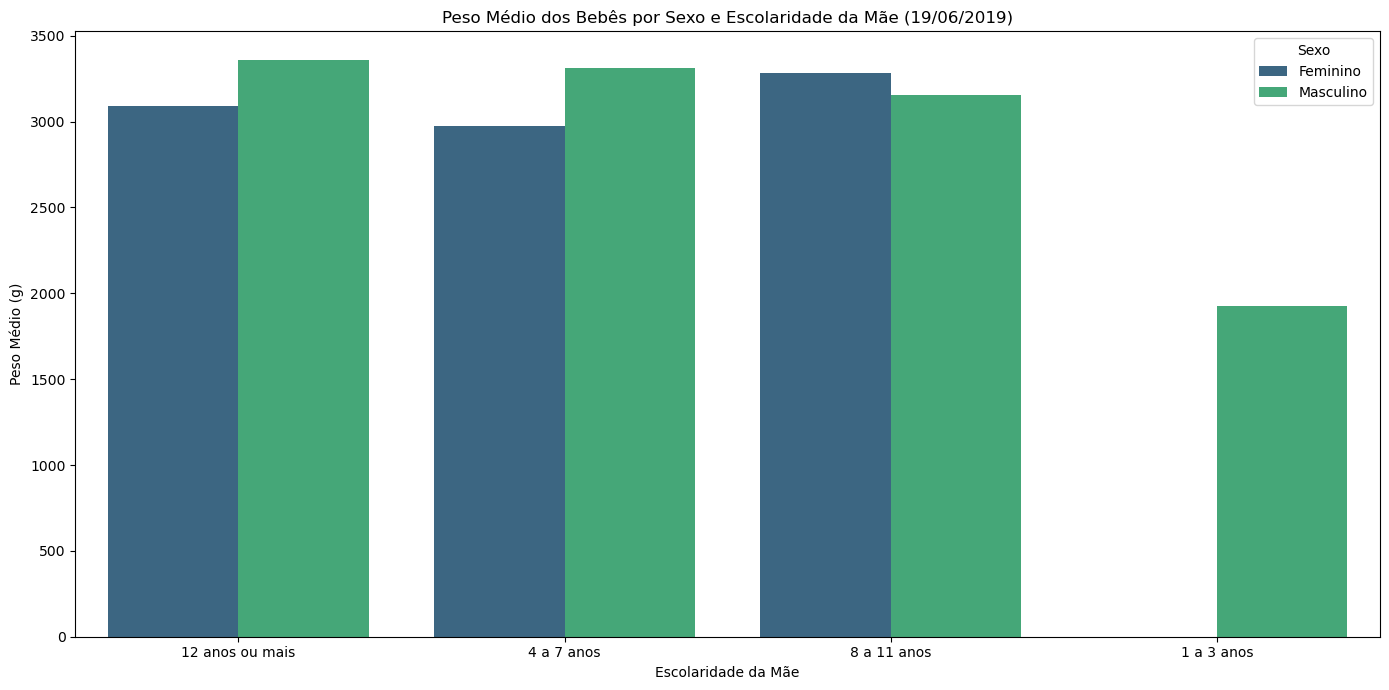

In [199]:
# Plotando os pesos médios dos bebês por sexo e faixas de escolaridade da mãe:
plt.figure(figsize=(14, 7))
sns.barplot(data=peso_medio_bebes, x='Escolaridade da Mãe', y='Peso Médio', hue='Sexo', palette='viridis')
plt.title('Peso Médio dos Bebês por Sexo e Escolaridade da Mãe (19/06/2019)')
plt.xlabel('Escolaridade da Mãe')
plt.ylabel('Peso Médio (g)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

### 3. Qual o municipio que nasceu menos bebês em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

### Identificando o município com o menor número de nascimentos:

In [202]:
# Contando o número de nascimentos por município
nascimentos_por_municipio = sinasc_raw.groupby('munResNome').size().reset_index(name='Numero de Nascimentos')

# Encontrando o município com o menor número de nascimentos:
municipio_menor_nascimentos = nascimentos_por_municipio.loc[nascimentos_por_municipio['Numero de Nascimentos'].idxmin()]

# Exibir o município com o menor número de nascimentos:
print("Município com o menor número de nascimentos:")
print(municipio_menor_nascimentos)

Município com o menor número de nascimentos:
munResNome               Município ignorado - RO
Numero de Nascimentos                          1
Name: 28, dtype: object


### Calculando a idade média, máxima e mínima das mães e dos pais no município identificado:

In [204]:
# Filtrando os dados para o município com o menor número de nascimentos
municipio_nome = municipio_menor_nascimentos['munResNome']
dados_municipio = sinasc_raw[sinasc_raw['munResNome'] == municipio_nome]

# Calculando as idades das mães e pais
idade_mae = dados_municipio['IDADEMAE']
idade_pai = dados_municipio['IDADEPAI']

# Calculando a idade média, máxima e mínima das mães e pais
idade_media_mae = idade_mae.mean()
idade_maxima_mae = idade_mae.max()
idade_minima_mae = idade_mae.min()

idade_media_pai = idade_pai.mean()
idade_maxima_pai = idade_pai.max()
idade_minima_pai = idade_pai.min()

# Exibindo as idades
print(f"Idade média das mães no município '{municipio_nome}': {idade_media_mae:.2f}")
print(f"Idade máxima das mães no município '{municipio_nome}': {idade_maxima_mae}")
print(f"Idade mínima das mães no município '{municipio_nome}': {idade_minima_mae}")

print(f"Idade média dos pais no município '{municipio_nome}': {idade_media_pai:.2f}")
print(f"Idade máxima dos pais no município '{municipio_nome}': {idade_maxima_pai}")
print(f"Idade mínima dos pais no município '{municipio_nome}': {idade_minima_pai}")


Idade média das mães no município 'Município ignorado - RO': 24.00
Idade máxima das mães no município 'Município ignorado - RO': 24
Idade mínima das mães no município 'Município ignorado - RO': 24
Idade média dos pais no município 'Município ignorado - RO': 22.00
Idade máxima dos pais no município 'Município ignorado - RO': 22.0
Idade mínima dos pais no município 'Município ignorado - RO': 22.0


In [205]:
# Criando um DataFrame com informações organizadas:
resultados = pd.DataFrame({
    'Métrica': [
        'Idade Média das Mães',
        'Idade Máxima das Mães',
        'Idade Mínima das Mães',
        'Idade Média dos Pais',
        'Idade Máxima dos Pais',
        'Idade Mínima dos Pais'
    ],
    'Valor': [
        f'{idade_media_mae:.2f}',
        f'{idade_maxima_mae:.0f}',
        f'{idade_minima_mae:.0f}',
        f'{idade_media_pai:.2f}',
        f'{idade_maxima_pai:.1f}',
        f'{idade_minima_pai:.1f}'
    ],
    'Município': [municipio_nome] * 6
})

# Exibindo o DataFrame
print("\nResultados para o município com o menor número de nascimentos:")
resultados


Resultados para o município com o menor número de nascimentos:


,Métrica,Valor,Município
0,Idade Média das Mães,24.00,Município ignorado - RO
1,Idade Máxima das Mães,24,Município ignorado - RO
2,Idade Mínima das Mães,24,Município ignorado - RO
3,Idade Média dos Pais,22.00,Município ignorado - RO
4,Idade Máxima dos Pais,22.0,Município ignorado - RO
5,Idade Mínima dos Pais,22.0,Município ignorado - RO


### Plotando as informações para uma melhor visualização:

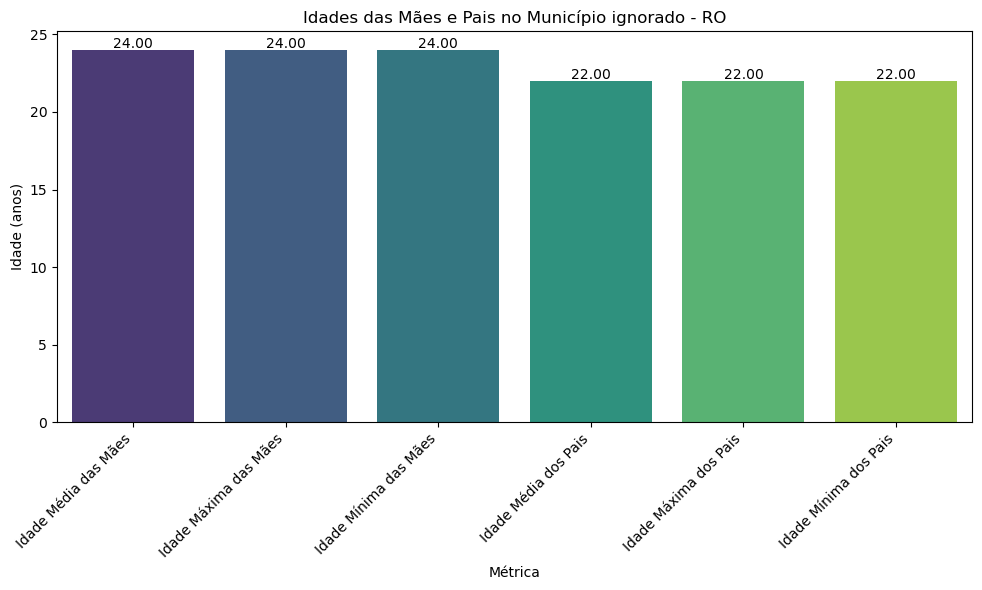

In [207]:
# Dados para o gráfico
metricas = [
    'Idade Média das Mães',
    'Idade Máxima das Mães',
    'Idade Mínima das Mães',
    'Idade Média dos Pais',
    'Idade Máxima dos Pais',
    'Idade Mínima dos Pais'
]

valores = [
    idade_media_mae,
    idade_maxima_mae,
    idade_minima_mae,
    idade_media_pai,
    idade_maxima_pai,
    idade_minima_pai
]

# Criando um DataFrame para os dados do gráfico
df_plot = pd.DataFrame({
    'Métrica': metricas,
    'Valor': valores,
    'Município': [municipio_nome] * len(metricas)
})

# Configurações do gráfico:
plt.figure(figsize=(10, 6))
sns.barplot(x='Métrica', y='Valor', data=df_plot, palette='viridis')

# Adicionando título e rótulos:
plt.title(f'Idades das Mães e Pais no {municipio_nome}')
plt.xlabel('Métrica')
plt.ylabel('Idade (anos)')
plt.xticks(rotation=45, ha='right')

# Adicionando valores no gráfico:
for index, value in enumerate(valores):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [209]:
# Passo 1: Identificando o município com o maior número de nascimentos em março:
nascimentos_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]
nascimentos_por_municipio_marco = nascimentos_marco.groupby('munResNome').size().reset_index(name='Numero de Nascimentos')
municipio_mais_nascimentos_marco = nascimentos_por_municipio_marco.loc[nascimentos_por_municipio_marco['Numero de Nascimentos'].idxmax()]
municipio_nome_marco = municipio_mais_nascimentos_marco['munResNome']

print("Município com o maior número de nascimentos em março:")
print(municipio_mais_nascimentos_marco)

# Passo 2: Calculando a quantidade de filhos vivos média, máxima e mínima e a idade média, máxima e mínima dos pais:
dados_municipio_marco = nascimentos_marco[nascimentos_marco['munResNome'] == municipio_nome_marco]

quantidade_filhos_vivos = dados_municipio_marco['QTDFILVIVO']
quantidade_media_filhos = quantidade_filhos_vivos.mean()
quantidade_maxima_filhos = quantidade_filhos_vivos.max()
quantidade_minima_filhos = quantidade_filhos_vivos.min()

idade_pai = dados_municipio_marco['IDADEPAI']

idade_media_pai = idade_pai.mean()
idade_maxima_pai = idade_pai.max()
idade_minima_pai = idade_pai.min()

# Criando um DataFrame para exibir os resultados:
resultados_marco = pd.DataFrame({
    'Métrica': [
        'Quantidade Média de Filhos Vivos',
        'Quantidade Máxima de Filhos Vivos',
        'Quantidade Mínima de Filhos Vivos',
        'Idade Média dos Pais',
        'Idade Máxima dos Pais',
        'Idade Mínima dos Pais'
    ],
    'Valor': [
        f'{quantidade_media_filhos:.2f}',
        f'{quantidade_maxima_filhos:.0f}',
        f'{quantidade_minima_filhos:.0f}',
        f'{idade_media_pai:.2f}',
        f'{idade_maxima_pai:.0f}',
        f'{idade_minima_pai:.0f}'
    ],
    'Município': [municipio_nome_marco] * 6
})

# Exibindo o DataFrame com os resultados:
print("\nResultados para o município com o maior número de nascimentos em março:")
resultados_marco


Município com o maior número de nascimentos em março:
munResNome               Porto Velho
Numero de Nascimentos            744
Name: 36, dtype: object

Resultados para o município com o maior número de nascimentos em março:


,Métrica,Valor,Município
0,Quantidade Média de Filhos Vivos,1.30,Porto Velho
1,Quantidade Máxima de Filhos Vivos,9,Porto Velho
2,Quantidade Mínima de Filhos Vivos,0,Porto Velho
3,Idade Média dos Pais,34.63,Porto Velho
4,Idade Máxima dos Pais,62,Porto Velho
5,Idade Mínima dos Pais,19,Porto Velho


### Plotando as informações para uma melhor visualização:

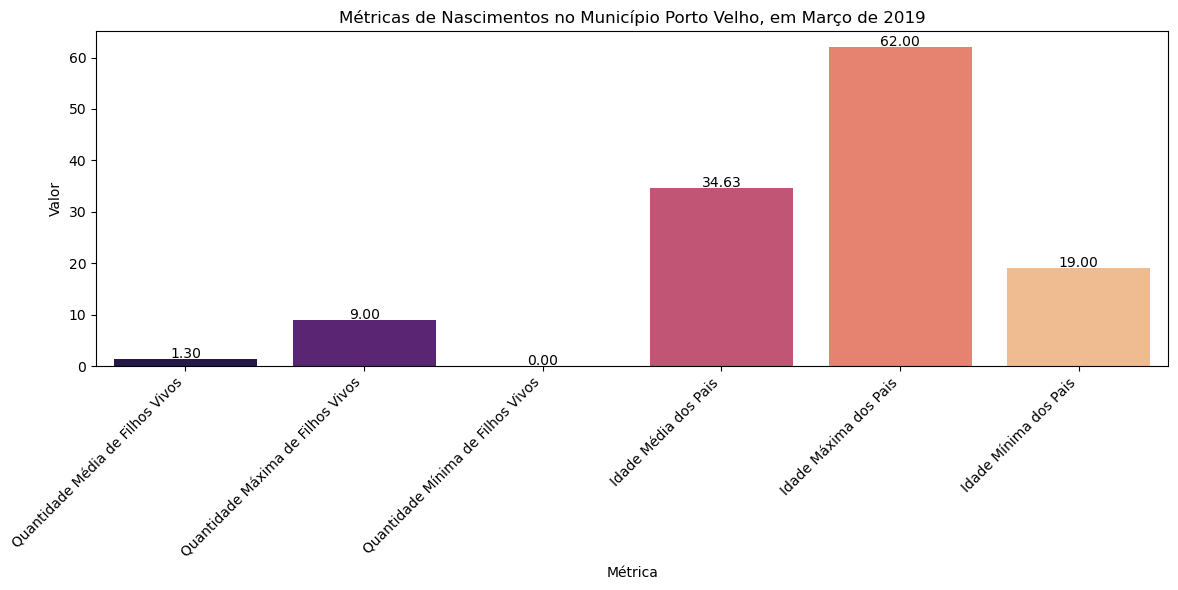

In [211]:
# Dados para o gráfico:
metricas = [
    'Quantidade Média de Filhos Vivos',
    'Quantidade Máxima de Filhos Vivos',
    'Quantidade Mínima de Filhos Vivos',
    'Idade Média dos Pais',
    'Idade Máxima dos Pais',
    'Idade Mínima dos Pais'
]

valores = [
    quantidade_media_filhos,
    quantidade_maxima_filhos,
    quantidade_minima_filhos,
    idade_media_pai,
    idade_maxima_pai,
    idade_minima_pai
]

# Criando um DataFrame para os dados do gráfico:
df_plot_marco = pd.DataFrame({
    'Métrica': metricas,
    'Valor': valores,
    'Município': [municipio_nome_marco] * len(metricas)
})

# Configurações do gráfico:
plt.figure(figsize=(12, 6))
sns.barplot(x='Métrica', y='Valor', data=df_plot_marco, palette='magma')

# Adicionar título e rótulos
plt.title(f'Métricas de Nascimentos no Município {municipio_nome_marco}, em Março de 2019')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.xticks(rotation=45, ha='right')

# Adicionando valores no gráfico:
for index, value in enumerate(valores):
    plt.text(index, value + 0.2, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()


### Análise das respostas encontradas:

1. Podemos perceber o município de Roraima com menor número de nascimentos: município ignorado com 1 nascimento, com idade média dos pais entre 22 e 24 anos.
2. Podemos perceber o município de Roraima com maior número de nascimentos: Porto Velho, com 744 nascimentos, com idade média dos pais de 34 anos.
3. Percebemos ao correlacionar o peso médio dos bebês com o sexo e a escolaridade da mãe que os bebês do sexo masculino pesam mais do que os bebês do sexo feminino.

### Outras análises:

In [215]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [216]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [217]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### Proporção entre tipos de parto (Cesáreo ou Vaginal):

            ESCMAE         GESTACAO GRAVIDEZ    PARTO      DTNASC       SEXO  \
0      8 a 11 anos  37 a 41 semanas    Única  Cesáreo  2019-02-19  Masculino   
1      8 a 11 anos  37 a 41 semanas    Única  Cesáreo  2019-02-21   Feminino   
2      8 a 11 anos  37 a 41 semanas    Única  Cesáreo  2019-02-25   Feminino   
3  12 anos ou mais  37 a 41 semanas    Única  Cesáreo  2019-03-20   Feminino   
4      8 a 11 anos  37 a 41 semanas    Única  Cesáreo  2019-03-23   Feminino   

  RACACOR  DTCADASTRO CODANOMAL VERSAOSIST   DTRECEBIM munResStatus  \
0  Branca  2019-03-08       NaN     3.2.01  2019-03-08        ATIVO   
1  Branca  2019-03-08       NaN     3.2.01  2019-03-08        ATIVO   
2  Branca  2019-03-08       NaN     3.2.01  2019-03-08        ATIVO   
3   Parda  2019-04-03       NaN     3.2.01  2019-04-09        ATIVO   
4   Parda  2019-04-03       NaN     3.2.01  2019-04-09        ATIVO   

  munResTipo               munResNome  munResUf  
0      MUNIC    Alta Floresta D'Oeste  Ron

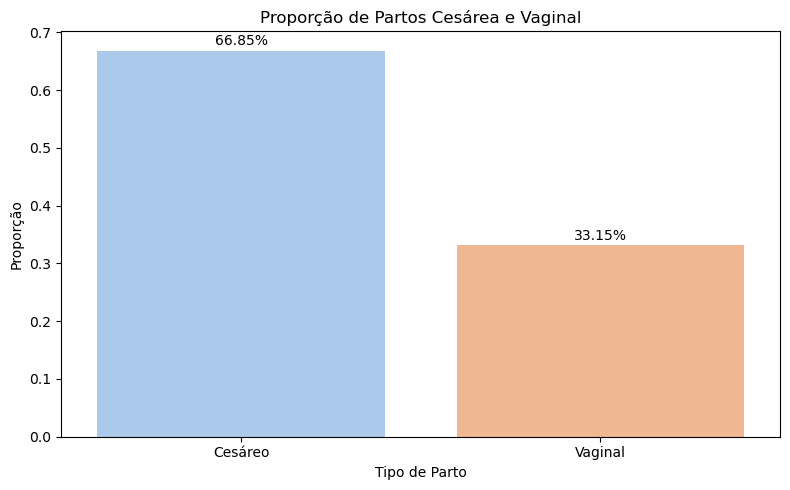

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Verificar as colunas disponíveis e seu tipo
print(sinasc_raw.select_dtypes(exclude=['int64', 'float64']).head())

# Passo 1: Calcular as proporções de partos cesárea e vaginal
proporcao_partos = sinasc_raw['PARTO'].value_counts(normalize=True).reset_index()
proporcao_partos.columns = ['Tipo de Parto', 'Proporção']

# Passo 2: Criar uma tabela com as proporções
print("\nTabela com as proporções entre partos cesárea e vaginal:")
print(proporcao_partos)

# Passo 3: Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Tipo de Parto', y='Proporção', data=proporcao_partos, palette='pastel')

# Adicionar título e rótulos
plt.title('Proporção de Partos Cesárea e Vaginal')
plt.xlabel('Tipo de Parto')
plt.ylabel('Proporção')

# Adicionar valores no gráfico
for index, row in proporcao_partos.iterrows():
    plt.text(index, row['Proporção'] + 0.01, f'{row["Proporção"]:.2%}', ha='center')

plt.tight_layout()
plt.show()


Análise: percebemos, no gráfico acima, o número maior de partos de cesariana.